In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import interpolate
from scipy.integrate import odeint

$S(t) + I(t) + R(t) = N$

$\dot{S}=-\alpha S$

$\dot{I}=\alpha S -\beta I$

$\dot{R} = \beta I$

In [2]:
alpha = 0.5
beta = 0.3
N = 1000000
S_0 = 990000
I_0 = 7000
R_0 = 3000
t_0 = 0
t_f = 25
t_steps = np.linspace(t_0, t_f, 100)
colors = ["blue", "red", "green"]

# Assume $I^{\star}$ is very small. Then model equations always work.

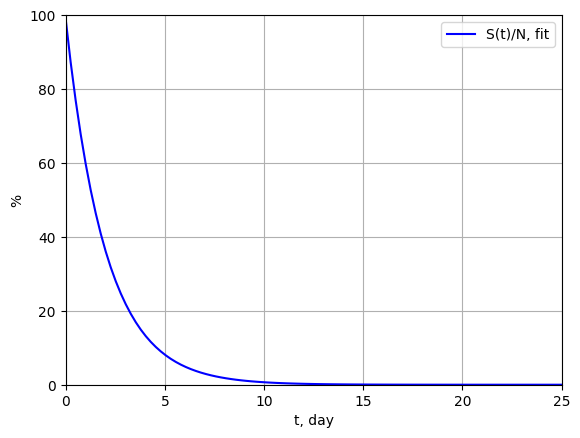

In [3]:
def dSdt(t, S):
    return -alpha*S

# solving diff equtation for S(t)
soln_S = solve_ivp(dSdt, (t_0, t_f), [S_0], t_eval=t_steps, dense_output=True)
S = soln_S.y[0]

# fitting numerical solution
S_fit = interpolate.interp1d(t_steps, S)


# plt.plot(t, S, label="fraction of Susceptible individuals")
plt.plot(t_steps, S_fit(t_steps)/N*100, color=colors[0], label="S(t)/N, fit")
plt.ylim([0,100])
plt.xlim([t_0,t_f])
plt.xlabel("t, day")
plt.ylabel("%")
plt.grid()
plt.legend()

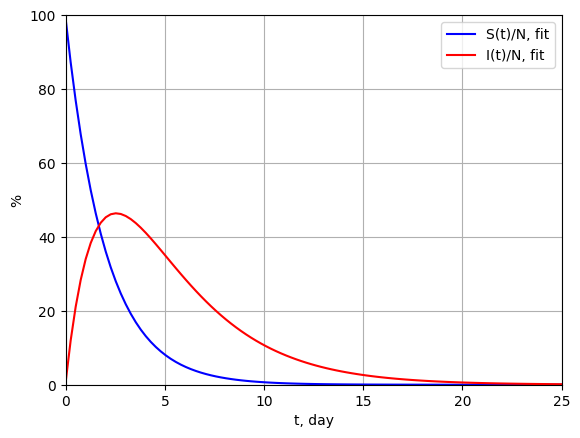

In [4]:
def dIdt(t, I):
    return alpha*S_fit(t) - beta*I

# solving diff equtation for I(t)
soln_I = solve_ivp(dIdt, (t_0, t_f), [I_0], t_eval=t_steps, dense_output=True)


I = soln_I.y[0]
# fitting numerical solution
I_fit = interpolate.interp1d(t_steps, I)


plt.plot(t_steps, S_fit(t_steps)/N*100, color=colors[0], label="S(t)/N, fit")
plt.plot(t_steps, I_fit(t_steps)/N*100, color=colors[1], label="I(t)/N, fit")
plt.ylim([0,100])
plt.xlim([t_0,t_f])
plt.xlabel("t, day")
plt.ylabel("%")
plt.grid()
plt.legend()

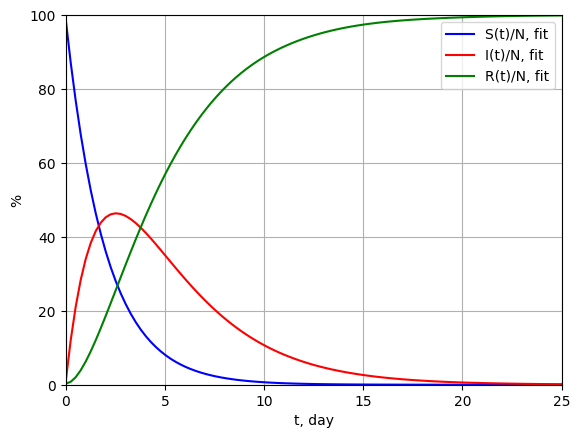

In [5]:
def dRdt(t, R):
    return beta*I_fit(t)

# solving diff equtation for R(t)
soln_R = solve_ivp(dRdt, (t_0, t_f), [R_0], t_eval=t_steps, dense_output=True)

R = soln_R.y[0]

# fitting numerical solution
R_fit = interpolate.interp1d(t_steps, R)


plt.plot(t_steps, S_fit(t_steps)/N*100, color=colors[0], label="S(t)/N, fit")
plt.plot(t_steps, I_fit(t_steps)/N*100, color=colors[1], label="I(t)/N, fit")
plt.plot(t_steps, R_fit(t_steps)/N*100, color=colors[2], label="R(t)/N, fit")
plt.ylim([0,100])
plt.xlim([t_0,t_f])
plt.xlabel("t, day")
plt.ylabel("%")
plt.grid()
plt.legend()

# Now let's consider non zero $I^{*}$ 

# Case 1.

$I^{\star}>I_0$, so all infected individuals quickly recover. In result we don't have epidemy

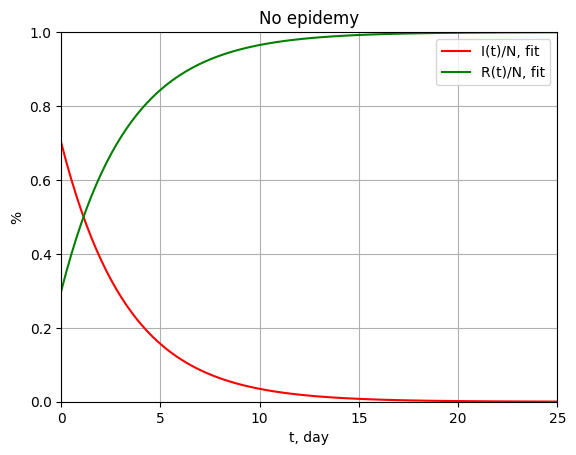

In [9]:
I_star = I_0+1 


# let X = [S; I]
# and dX/dt = A*X if I>I*
# and dX/dt = A_star*X if I<=I*
# then R = N-S-I
# A0 = np.array([10, 20, 30])
X0 = np.array([S_0, I_0])
# X0 = np.matrix([R_0, I_0]).T
A = np.array([[-alpha, 0],
               [alpha, -beta],])
A_star = np.array([[0, 0],
               [0, -beta],])
# A = np.matrix([[-alpha, 0], [alpha, beta]])
# A_star = np.matrix([[-0, 0], [0, beta]])
# print(np.dot(A, X0))
def dXdt(X, t):
    if X.item(1) > I_star:
        return np.dot(A,X)
    else:
        return np.dot(A_star,X)
    
X = odeint(dXdt, X0, t_steps)
S = X[:,0]
# print(S)
I = X[:,1]
R = N - S - I
S_fit = interpolate.interp1d(t_steps, S)
I_fit = interpolate.interp1d(t_steps, I)
R_fit = interpolate.interp1d(t_steps, R)

# plt.plot(t_steps, S_fit(t_steps)/N*100, color=colors[0], label="S(t)/N, fit")
plt.plot(t_steps, I_fit(t_steps)/N*100, color=colors[1], label="I(t)/N, fit")
plt.plot(t_steps, R_fit(t_steps)/N*100, color=colors[2], label="R(t)/N, fit")
plt.title("No epidemy")
plt.ylim([0,1])
plt.xlim([t_0,t_f])
plt.xlabel("t, day")
plt.ylabel("%")
plt.grid()
plt.legend()

# Case 2.

$I^{\star}<I_0$, Epidemy

7000.0
7000.853266704001
7000.853265519172
7001.706531038347
7001.706529853519
7609.398409179353
7609.3985228960055
8216.48917588434
8216.489403239815
8822.979398045798
8822.979625245604
13076.337237486467
13076.341863074817
11415.910916952716
11415.912645335338
9342.447333906719
9342.447403403881
9861.474420329001
9861.47435067674
10380.060739003868
10380.060738937322
10898.206853786962
10898.20685371707
11933.179404791554
11933.179404456225
12966.394284186481
12966.394284355212
13997.853771967646
13997.853772136568
15027.560143902823
15027.560143903924
16055.51567306858
16055.51567306971
26239.272865120154
26239.27286819174
36250.42681994845
36250.426826562056
46091.20734096556
46091.207331369995
55763.8180926184
55763.81808931985
65270.43702409321
65270.43702297422
74613.21656002491
74613.21655892178
122736.68665977425
122736.68590997094
166388.0371852877
166388.03291378502
205878.07839358042
205878.08120586304
241498.1909768917
241498.19602340425
273521.4436323385
273521.4452177482

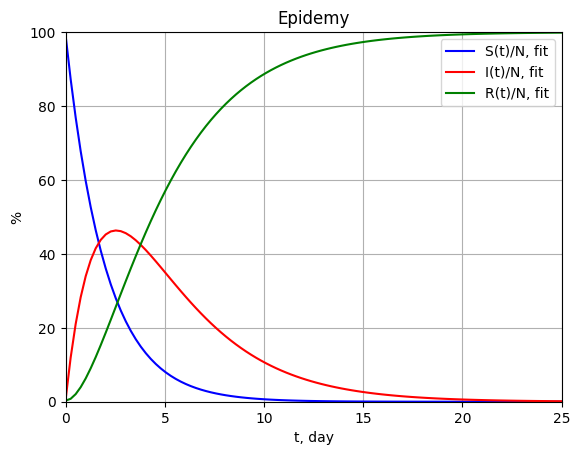

In [10]:
I_star = 5000 


# let X = [S; I]
# and dX/dt = A*X if I>I*
# and dX/dt = A_star*X if I<=I*
# then R = N-S-I
# A0 = np.array([10, 20, 30])
X0 = np.array([S_0, I_0])
# X0 = np.matrix([R_0, I_0]).T
A = np.array([[-alpha, 0],
               [alpha, -beta],])
A_star = np.array([[0, 0],
               [0, -beta],])
# A = np.matrix([[-alpha, 0], [alpha, beta]])
# A_star = np.matrix([[-0, 0], [0, beta]])
# print(np.dot(A, X0))
def dXdt(X, t):
    print(X.item(1))
    if X.item(1) > I_star:
        return np.dot(A,X)
    else:
        return np.dot(A_star,X)
    
X = odeint(dXdt, X0, t_steps)
S = X[:,0]
# print(S)
I = X[:,1]
R = N - S - I
S_fit = interpolate.interp1d(t_steps, S)
I_fit = interpolate.interp1d(t_steps, I)
R_fit = interpolate.interp1d(t_steps, R)

plt.plot(t_steps, S_fit(t_steps)/N*100, color=colors[0], label="S(t)/N, fit")
plt.plot(t_steps, I_fit(t_steps)/N*100, color=colors[1], label="I(t)/N, fit")
plt.plot(t_steps, R_fit(t_steps)/N*100, color=colors[2], label="R(t)/N, fit")
plt.title("Epidemy")
plt.ylim([0,100])
plt.xlim([t_0,t_f])
plt.xlabel("t, day")
plt.ylabel("%")
plt.grid()
plt.legend()